In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

Data loading & Exploration

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Display the shape of the dataset
print(f"Training data shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:

# Class names in the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

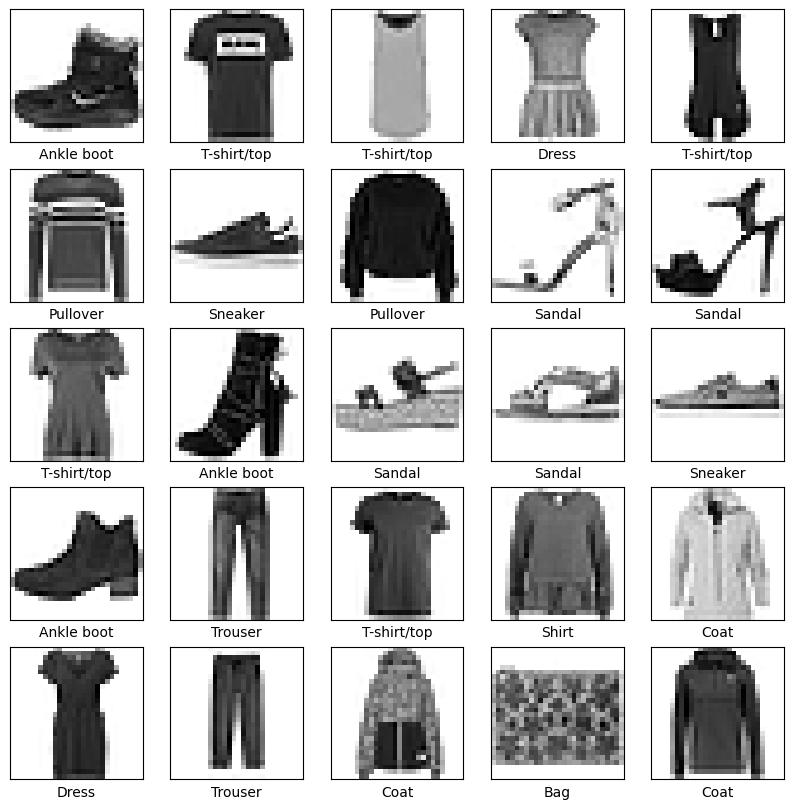

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Data Preprocessing

In [7]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0


In [8]:
# Reshape the data to fit the model input requirements (28x28 images, 1 channel)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [9]:
# Display the shape after reshaping
print(f"Training data shape after reshaping: {train_images.shape}")
print(f"Test data shape after reshaping: {test_images.shape}")

Training data shape after reshaping: (60000, 28, 28, 1)
Test data shape after reshaping: (10000, 28, 28, 1)


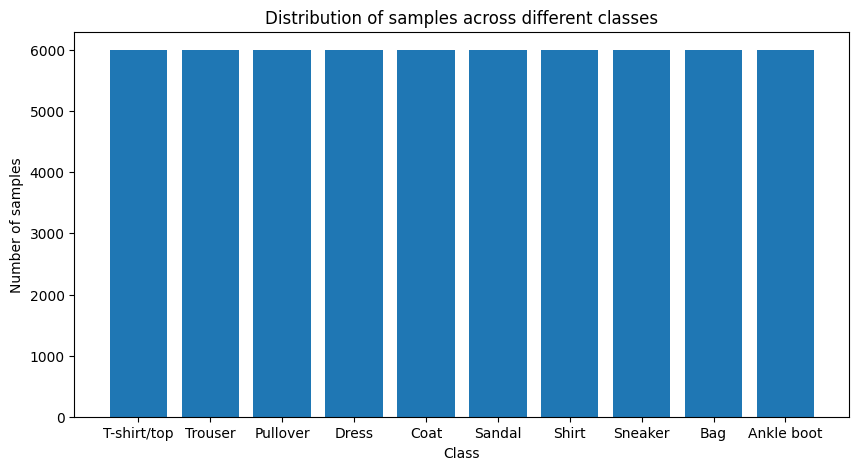

In [10]:
# Display a bar chart showing the distribution of samples across different classes
plt.figure(figsize=(10,5))
plt.bar(class_names, np.bincount(train_labels))
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Distribution of samples across different classes')
plt.show()


ANN

In [11]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Model Compilation

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train the Model

In [13]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.4840 - accuracy: 0.8231 - val_loss: 0.3718 - val_accuracy: 0.8643
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3130 - accuracy: 0.8866 - val_loss: 0.2980 - val_accuracy: 0.8916
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2676 - accuracy: 0.9015 - val_loss: 0.2998 - val_accuracy: 0.8918
Epoch 4/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2371 - accuracy: 0.9122 - val_loss: 0.3035 - val_accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2155 - accuracy: 0.9198 - val_loss: 0.2779 - val_accuracy: 0.8986
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1941 - accuracy: 0.9274 - val_loss: 0.2496 - val_accuracy: 0.9089
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1796 - accuracy: 0.9323 - val_loss: 0.2665 -

Evaluation

313/313 - 3s - loss: 0.2914 - accuracy: 0.9092 - 3s/epoch - 11ms/step
Test accuracy: 0.9092000126838684


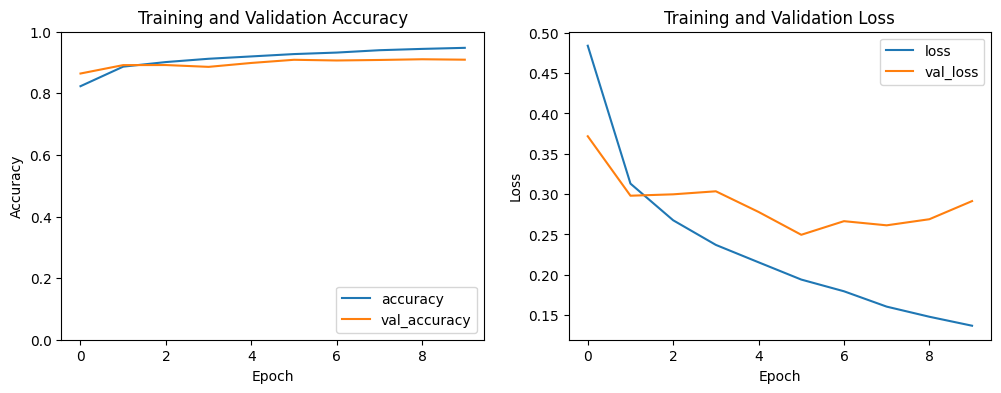

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Visualize training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


 Test Set Prediction

313/313 [==============================] - 5s 15ms/step


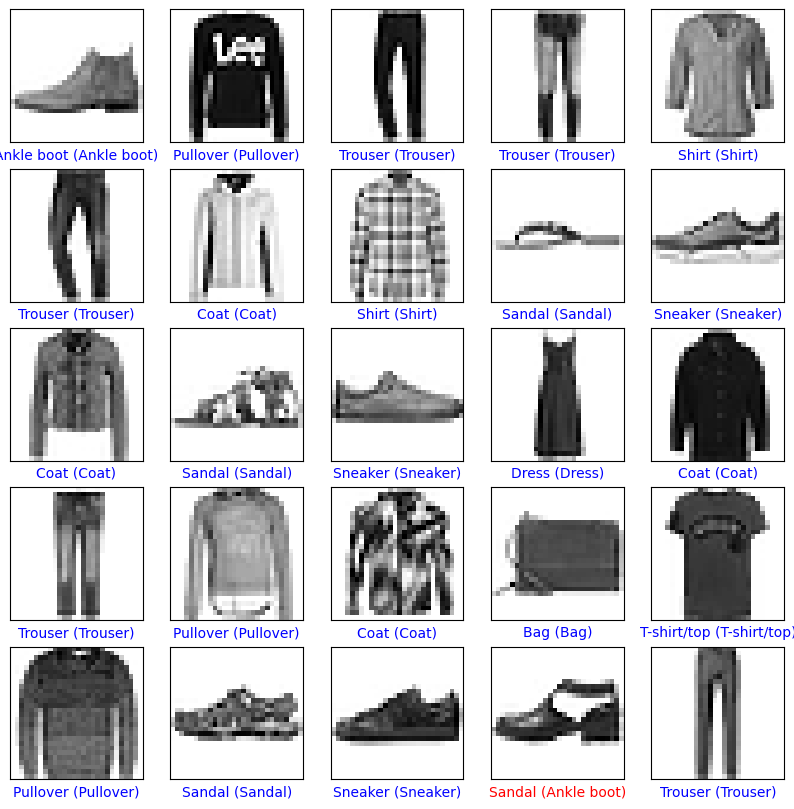

In [15]:
# Predict on the test set
predictions = model.predict(test_images)

# Display a few sample predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[np.argmax(predictions[i])]} ({class_names[test_labels[i]]})",
               color='blue' if np.argmax(predictions[i]) == test_labels[i] else 'red')
plt.show()
